In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
plt.style.use('ggplot')

In [5]:
iris = load_iris()

In [6]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [17]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [18]:
df['target'] = iris.target

In [88]:
df.shape

(150, 5)

In [22]:
X = df.drop('target', axis = 1)

## Feature Scaling 

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [23]:
X_scaled = scaler.fit_transform(X)

## PCA

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=4, random_state=2022)

In [35]:
X_pca4 = pca.fit_transform(X_scaled)

In [37]:
print('Explained variance for the 4 principal components = ', sum(pca.explained_variance_ratio_*100))

Explained variance for the 4 principal components =  100.0


In [43]:
pca.explained_variance_ratio_*100

array([72.96244541, 22.85076179,  3.66892189,  0.51787091])

In [47]:
print("Explained variance for first principal component: ", np.cumsum(pca.explained_variance_ratio_*100)[0])
print("Explained variance for first 2 principal components: ", np.cumsum(pca.explained_variance_ratio_*100)[1])
print("Explained variance for first 3 principal components: ", np.cumsum(pca.explained_variance_ratio_*100)[2])

Explained variance for first principal component:  72.96244541329987
Explained variance for first 2 principal components:  95.81320720000166
Explained variance for first 3 principal components:  99.48212908928453


## Ploting

## PCA

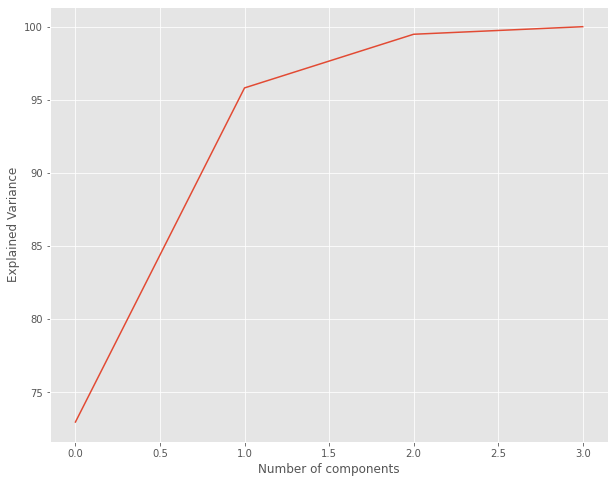

In [65]:
plt.rcParams['figure.figsize'] = (10,8)
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.savefig('elbowfigure.png')

### 2D

In [55]:
pca2 = PCA(n_components=2)

In [56]:
X_pca2 = pca2.fit_transform(X_scaled)

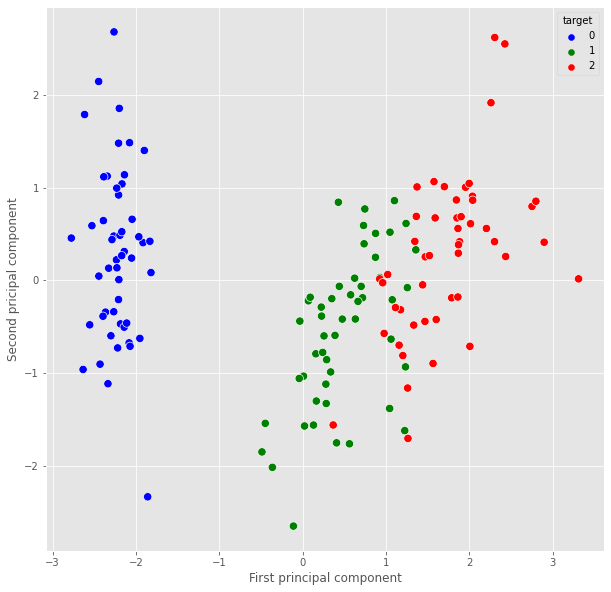

In [69]:
plt.rcParams['figure.figsize'] = (10,10)
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], s=70, hue=df.target, palette=['blue','green','red'])
plt.xlabel('First principal component')
plt.ylabel('Second pricipal component')
plt.savefig('2d_scatterplot.png')
plt.show()

## 3D

In [71]:
from mpl_toolkits import mplot3d

In [72]:
pca3 = PCA(n_components=3, random_state=2022)
X_pca3 = pca3.fit_transform(X_scaled)

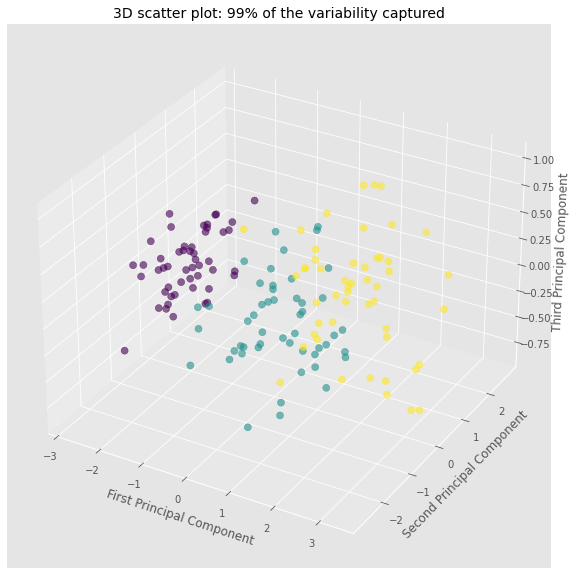

In [82]:
plt.rcParams['figure.figsize'] = (10,10)
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca3[:,0],X_pca3[:,1],X_pca3[:,2],c=df.target, s=50, alpha=0.6)
plt.title('3D scatter plot: 99% of the variability captured', fontweight=20, fontsize=14)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.savefig('3D_scatterplot_iris.svg')

## PCA 
* n_components = 0.95

In [83]:
pca_95 = PCA(n_components=0.95, random_state=2022)

In [84]:
X_pca_95 = pca_95.fit_transform(X_scaled)

In [87]:
X_pca_95.shape #taken 2 principal components out of the possible 4

(150, 2)

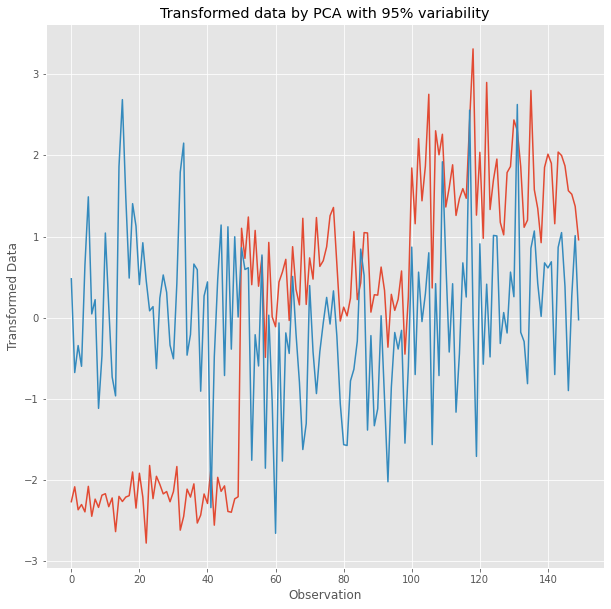

In [93]:
plt.plot(X_pca_95)
plt.title('Transformed data by PCA with 95% variability')
plt.xlabel('Observation')
plt.ylabel('Transformed Data')
plt.savefig('plot95.png')
plt.show()

## Creating New Dataset Using 2 Principal Components 

In [94]:
df_new = pd.DataFrame(X_pca_95, columns=['PC1', 'PC2'])
df_new['target'] = iris.target
df_new.head(10)

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
5,-2.075631,1.489178,0
6,-2.444029,0.047644,0
7,-2.232847,0.223148,0
8,-2.334640,-1.115328,0
9,-2.184328,-0.469014,0


In [95]:
df_new.shape

(150, 3)

In [96]:
df_new.to_csv('iris.csv')